# The Great 2011 Tohoku earthquake and the Fukushima Daiichi Accident: An Analysis

> The Tohoku earthquake was the most powerful earthquake ever recorded in Japan, and the fourth most powerful earthquake in the world since modern record-keeping began in 1900. This notebook is an analysis into the earthquakes in Japan and how frequently Japan should expect earthquakes of varying magnitude based on linear regression

- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- categories: [jupyter,matplotlib,python,model,linear,machine learning]
- hide: false
- image: images/stocks.jpeg
- show_image: true
- permalink: /japan-earthquakes/
- hide_binder_badge: false
- hide_colab_badge: false


In [1]:
# Hide
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import folium

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#Hide
df = pd.read_csv("/kaggle/input/earthquakes-in-japan/Japan earthquakes 2001 - 2018.csv")

In [3]:
#Hide
df['popup'] = pd.to_datetime(df['time']).dt.strftime("%Y-%m-%d")+": Magnitude "+df['mag'].astype(str)+": "+df['place'].str.upper()
df.sort_values('mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,popup
5016,2012-01-21T05:49:02.630Z,25.9060,128.3310,12.9,4.5,mb,63.0,76.8,NaN,0.83,...,"Ryukyu Islands, Japan",earthquake,NaN,7.4,NaN,18.0,reviewed,us,us,"2012-01-21: Magnitude 4.5: RYUKYU ISLANDS, JAPAN"
5917,2011-06-11T19:40:52.260Z,47.0100,155.4480,35.0,4.5,mb,28.0,138.5,NaN,0.99,...,east of the Kuril Islands,earthquake,NaN,NaN,NaN,6.0,reviewed,us,us,2011-06-11: Magnitude 4.5: EAST OF THE KURIL I...
5916,2011-06-11T20:08:58.670Z,37.0910,141.3300,21.2,4.5,mb,99.0,116.2,NaN,1.03,...,"near the east coast of Honshu, Japan",earthquake,NaN,5.8,NaN,43.0,reviewed,us,us,2011-06-11: Magnitude 4.5: NEAR THE EAST COAST...
11943,2005-10-24T18:58:20.770Z,25.5840,143.2330,35.0,4.5,mb,8.0,198.0,NaN,1.10,...,"Volcano Islands, Japan region",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us,"2005-10-24: Magnitude 4.5: VOLCANO ISLANDS, JA..."
2627,2014-11-11T06:49:04.470Z,37.4718,143.7204,10.0,4.5,mb,NaN,118.0,2.359,1.25,...,"237km ESE of Ishinomaki, Japan",earthquake,7.4,1.8,0.156,15.0,reviewed,us,us,2014-11-11: Magnitude 4.5: 237KM ESE OF ISHINO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,2011-03-11T06:15:40.280Z,36.2810,141.1110,42.6,7.9,mwc,163.0,48.4,NaN,1.44,...,"near the east coast of Honshu, Japan",earthquake,NaN,9.6,NaN,NaN,reviewed,us,us,2011-03-11: Magnitude 7.9: NEAR THE EAST COAST...
10974,2007-01-13T04:23:21.160Z,46.2430,154.5240,10.0,8.1,mwc,606.0,14.0,NaN,1.12,...,east of the Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt,2007-01-13: Magnitude 8.1: EAST OF THE KURIL I...
13084,2003-09-25T19:50:06.360Z,41.8150,143.9100,27.0,8.3,mwc,669.0,27.4,NaN,0.88,...,"Hokkaido, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,"2003-09-25: Magnitude 8.3: HOKKAIDO, JAPAN REGION"
11550,2006-11-15T11:14:13.570Z,46.5920,153.2660,10.0,8.3,mwc,576.0,20.9,NaN,1.07,...,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt,2006-11-15: Magnitude 8.3: KURIL ISLANDS


In [4]:
#Hide
# Loading the background map
#eq_map = folium.Map(location=[37.973265, 142.597713], zoom_start=5, tiles='Stamen Terrain', width=1250)
#fg = folium.FeatureGroup(name="My Map")
#
## Adding a circle for each earthquake
#for idx, eq in df.query('mag >= 6').iterrows():
#    #folium.Circle(location=(eq['latitude'], eq['longitude']), radius=20000 * (eq['mag']-6), color='red', fill=False, alpha = 0.4).add_to(eq_map)
#    fg.add_child(folium.CircleMarker(location=[eq['latitude'], 
#                                               eq['longitude']], 
#                                     radius=10 * (eq['mag']-6), 
#                                     color = 'red', 
#                                     fill_color='red', 
#                                     fill_opacity=0.4, 
#                                     popup=eq['popup']))
#    
#eq_map.add_child(fg)
#folium.Circle(location = (37.4218, 141.0337), color = 'yellow', fill_color = 'yellow', radius = 2000, popup="Fukushima Daiichi", fill_opacity=0.4).add_to(eq_map)
#eq_map

In [5]:
#Hide
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = ['Japan','Fiji','China','Russia','South Korea','North Korea','Mongolia']
japan_gdf = world.query("name in @countries")

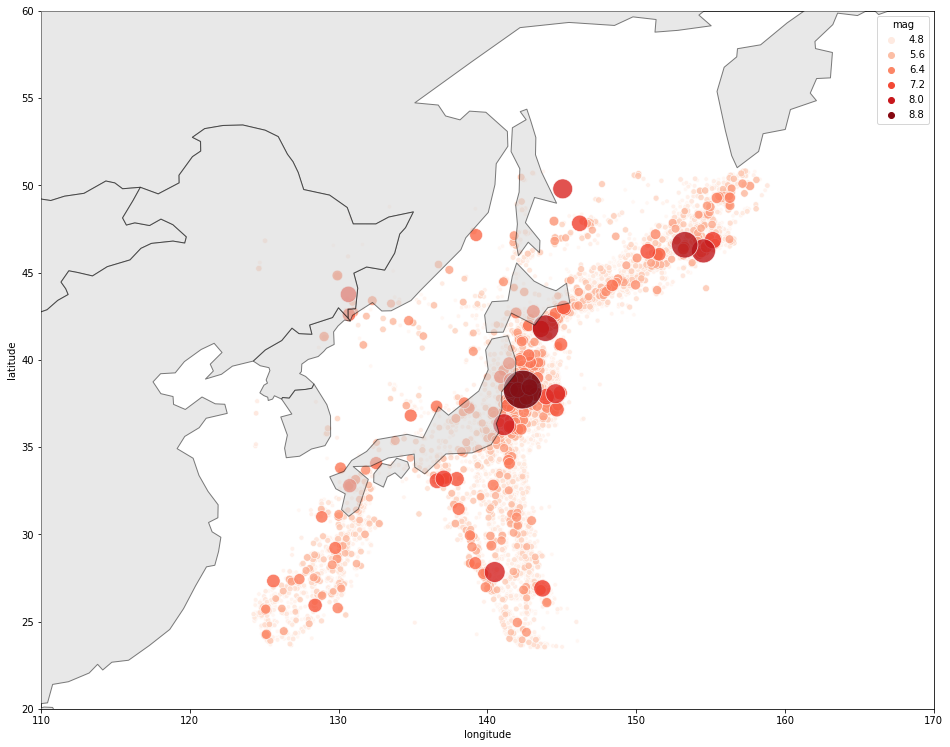

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
japan_gdf.plot(color =  'lightgray', edgecolor = 'k', ax =ax, zorder = 10, alpha = 0.5)
df.sort_values('mag', inplace=True)
sns.scatterplot(x = df['longitude'], 
                y = df['latitude'], 
                hue = df['mag'],
                s = 2.6**df['mag'],
                #sizes=(minsize, maxsize),
                ax = ax, 
                alpha = 0.8, palette= 'Reds',marker = '.');
plt.xlim(110,170)
plt.ylim(20,60)
plt.show();

<AxesSubplot:xlabel='mag', ylabel='freq'>

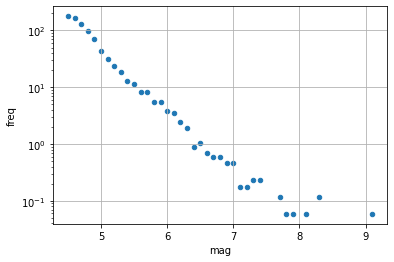

In [7]:
freq = (df
         .mag
         .value_counts()
         .sort_index()
         .rename_axis('mag')
         .reset_index(name='counts')
         .assign(freq = lambda x: x.counts/(pd.to_datetime(df['time']).dt.year.max() - \
                                            pd.to_datetime(df['time']).dt.year.min()))
       #  .drop(['counts'], axis =1)
      #   .query('mag <= 6.5')
      .assign(log_freq = lambda x: np.log10(x.freq))
        )
(freq
.plot
.scatter(x = 'mag', y = 'freq', logy=True, grid = True)
)

In [8]:
X = np.array(freq['mag']).reshape(-1,1)
y = np.array(freq['log_freq']).reshape(-1,1)
s = np.array(freq['counts'])

In [9]:
lm = LinearRegression()

lm.fit(X,y,s)

print(f"log10(Frequency) = {lm.coef_[0][0]:.2f}*[Magnitude] + {lm.intercept_[0]:.2f}\n")
print(f"Frequency = 10**({lm.coef_[0][0]:.2f}*[Magnitude] + {lm.intercept_[0]:.2f})")

log10(Frequency) = -1.17*[Magnitude] + 7.57

Frequency = 10**(-1.17*[Magnitude] + 7.57)


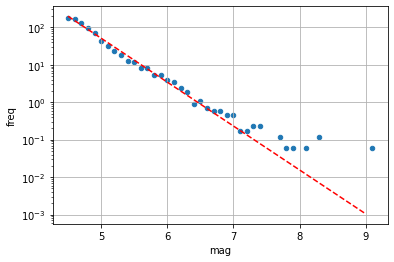

In [10]:
(freq
.plot
.scatter(x = 'mag', y = 'freq', logy=True, grid = True)
)
plt.plot(np.arange(4.5,9.1,0.1), 
         10**lm.predict(np.arange(4.5,9.1,0.1).reshape(-1,1)), 
         color = 'red', 
         linestyle = "--")